<a href="https://colab.research.google.com/github/OtusTeam/Machine-Learning/blob/main/%D0%9C%D0%BE%D0%B4%D1%83%D0%BB%D1%8C%207%3A%20Bayesian%20Learning%2C%20PyMC/37_04_BLR_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from theano import theano, tensor as tt
import pymc3 as pm
import pandas as pd
from sklearn import datasets
import numpy as np
from numpy import random
import pylab as plt
import seaborn as sns
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')
%matplotlib inline
plt.mpl.style.use('ggplot')

In [ ]:
data_ = datasets.load_boston()
data = pd.DataFrame(data=data_['data'], columns=data_['feature_names'])
y = data_['target']

In [ ]:
print('\n'.join(data_.DESCR.splitlines()[13:28]))

        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None


In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Создадим простую байесовскую линейную модель.

$PRICE \sim CRIM+ZN+INDUS+CHAS+NOX+RM+AGE+DIS+RAD+TAX+PTRATIO+B+LSTAT$

По умолчанию Prior на коэффициенты — Normal(mu=0, tau=1.0E-6), на константу — Flat.
Оценивать модель будем с помощью SVGD для разнообразия.

In [ ]:
from functools import partial
with pm.Model() as lm_model: 
    lm_model = pm.GLM(x=data, y=y)
    # для вариационных методов есть унифициорванный интерфейс через pm.fit
    histogram = pm.fit(200, method='svgd', obj_optimizer=partial(pm.adagrad, learning_rate=.7))

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.



И вот, мы получили распределение! По нему теперь можно строить доверительные интервалы, что мы и сделаем для коэффициентов при наших регрессорах.

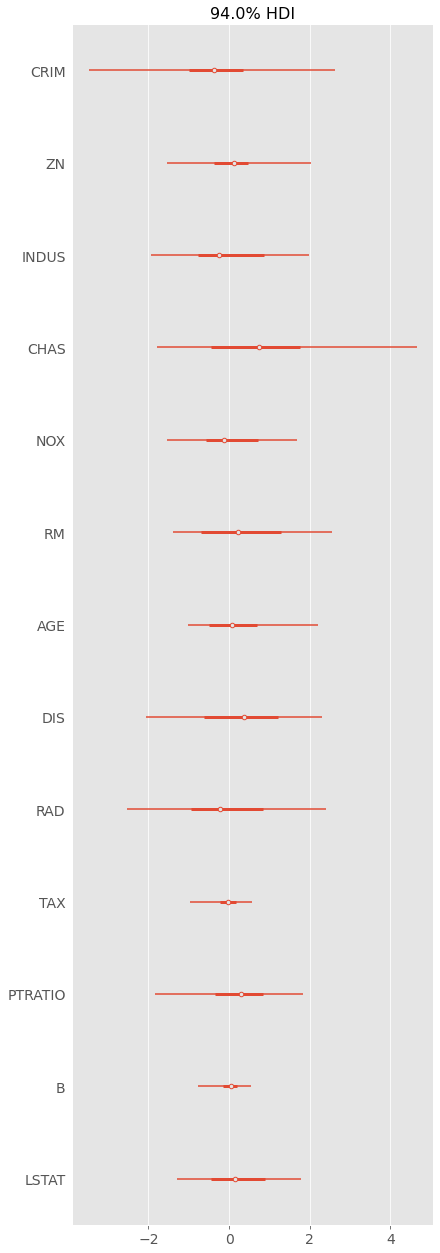

In [ ]:
# метод `histogram.sample` создает аналогичный объект, что мы получали с помощью pm.sample. 
# Это просто набор случайных реализаций из приближенного распределения
pm.plot_forest(histogram.sample(300), var_names=data.columns);